# <h1 align="center"> © RsydMathTech. <h1/>

# Lasso Regression & Support Vector Regression (SVR)

## 1. Lasso Regression
### Konsep
- Lasso = *Least Absolute Shrinkage and Selection Operator*.
- Lasso merupakan model regresi linear dengan **regularisasi L1**.
- Regularisasi L1 menambahkan penalti berupa nilai absolut koefisien:
  
  $$
  \text{Loss Function} = \sum (y_i - \hat{y_i})^2 + \alpha \sum |\beta_j|
  $$

- Dampak penalti L1:
  - Koefisien bisa mengecil hingga **tepat nol**.
  - Lasso otomatis melakukan **seleksi fitur**.
- Lasso sangat berguna ketika kita memiliki banyak fitur, tetapi hanya sebagian yang relevan.

### Hyperparameter Utama
- **alpha**: mengontrol kekuatan regularisasi.
  - Alpha besar → lebih banyak koefisien menjadi nol.
  - Alpha kecil → model mendekati regresi linear biasa.

---

## 2. Support Vector Regression (SVR)
### Konsep
- SVR adalah bentuk regresi dari Support Vector Machine (SVM).
- Tujuan utama: menemukan fungsi regresi yang tidak menyimpang lebih dari nilai toleransi tertentu (**epsilon**) dari data aktual.
- SVR tidak berusaha meminimalkan error semua titik, tetapi fokus pada titik-titik yang berada di luar margin epsilon.
- Kelebihan: dapat menggunakan **kernel trick**, sehingga bisa memodelkan hubungan **non-linear**.

### Fungsi Objektif
- SVR mencari fungsi:

  $$
  f(x) = w^Tx + b
  $$

  dengan syarat deviasi $|y - f(x)| \leq \epsilon$.

### Hyperparameter Utama
- **C**: mengontrol trade-off antara margin yang lebar dengan error kecil.
- **epsilon (ε)**: besar toleransi deviasi yang diperbolehkan.
- **kernel**: fungsi kernel yang digunakan, misalnya:
  - `linear`
  - `poly` (polynomial)
  - `rbf` (radial basis function)

---

## 3. Grid Search pada Lasso & SVR
- Sama seperti Ridge, kita dapat menggunakan **GridSearchCV** untuk mencari kombinasi parameter terbaik.
- **Lasso**:
  - Grid dapat berisi berbagai nilai `alpha`.
- **SVR**:
  - Grid dapat berisi kombinasi `C`, `epsilon`, dan `kernel`.

---

## 4. Perbandingan Model
| Model   | Regularisasi / Fungsi         | Kegunaan Utama |
|---------|--------------------------------|----------------|
| Ridge   | Penalti L2 (mengecilkan koefisien, tidak nol) | Mengatasi multikolinearitas |
| Lasso   | Penalti L1 (seleksi fitur, koefisien bisa nol) | Memilih fitur penting |
| SVR     | Margin & Kernel trick (non-linear) | Data kompleks / non-linear |

---

## Kesimpulan
- **Ridge**: mengecilkan koefisien, tetapi semua variabel tetap dipertahankan.  
- **Lasso**: mengecilkan koefisien dan bisa menghilangkan variabel yang kurang relevan.  
- **SVR**: memodelkan regresi dengan margin dan kernel, cocok untuk data non-linear.  
- Semua model ini dapat dioptimasi hyperparameternya menggunakan **Grid Search**.


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

# Load sample dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Lasso Regression + GridSearch


In [3]:
lasso = Lasso(max_iter=5000)

# Hyperparameter grid for Lasso
param_grid_lasso = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

grid_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring="r2")
grid_lasso.fit(X_train, y_train)

# Evaluation
y_pred_lasso = grid_lasso.predict(X_test)
print("===== Lasso Regression =====")
print("Best alpha:", grid_lasso.best_params_)
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print()

===== Lasso Regression =====
Best alpha: {'alpha': 0.1}
R2 Score: 0.4718547867276227
MSE: 2798.1934851697188



### Support Vector Regression (SVR) + GridSearch

In [4]:
svr = SVR()

# Hyperparameter grid for SVR
param_grid_svr = {
    "kernel": ["linear", "poly", "rbf"],
    "C": [0.1, 1, 10],
    "epsilon": [0.1, 0.2, 0.5]
}

grid_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring="r2")
grid_svr.fit(X_train, y_train)

# Evaluation
y_pred_svr = grid_svr.predict(X_test)
print("===== Support Vector Regression (SVR) =====")
print("Best params:", grid_svr.best_params_)
print("R2 Score:", r2_score(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))

===== Support Vector Regression (SVR) =====
Best params: {'C': 10, 'epsilon': 0.5, 'kernel': 'rbf'}
R2 Score: 0.4948626674222323
MSE: 2676.294241837912


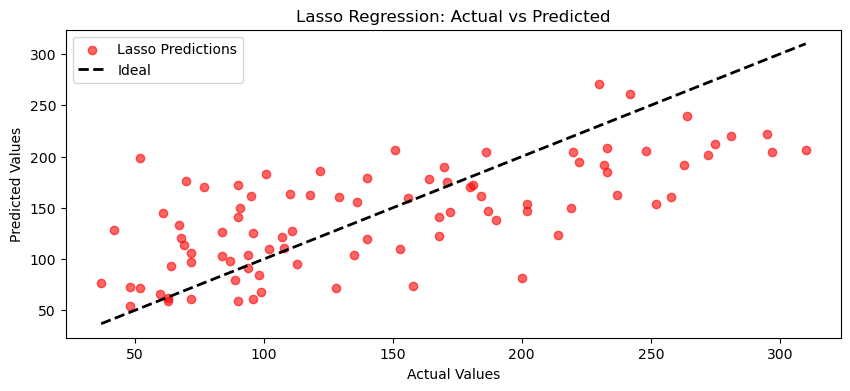

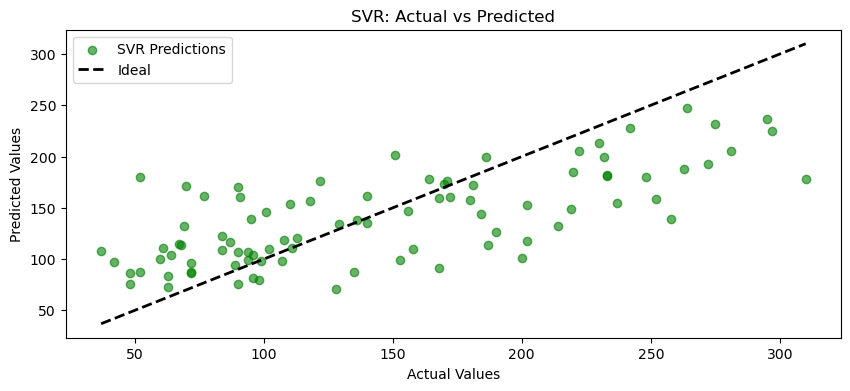

In [5]:
import matplotlib.pyplot as plt

# Lasso vs Actual
plt.figure(figsize=(10,4))
plt.scatter(y_test, y_pred_lasso, color='red', alpha=0.6, label="Lasso Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual vs Predicted")
plt.legend()
plt.show()

# SVR vs Actual
plt.figure(figsize=(10,4))
plt.scatter(y_test, y_pred_svr, color='green', alpha=0.6, label="SVR Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR: Actual vs Predicted")
plt.legend()
plt.show()

# Kesimpulan dari Lasso Regression & SVR di atas

## Lasso Regression
- **Best alpha** ditemukan lewat GridSearchCV.  
- Regularisasi L1 → beberapa koefisien bisa nol → seleksi fitur otomatis.  
- Model lebih **sederhana** dan **tidak overfit**.  
- **R² dan MSE** pada data test menunjukkan performa prediksi.  
- **Visual**: scatter plot prediksi vs actual mendekati garis ideal, titik yang jauh menunjukkan deviasi karena noise atau fitur kurang relevan.

## Support Vector Regression (SVR)
- Hyperparameter (`C`, `epsilon`, `kernel`) dicari lewat GridSearchCV.  
- Margin epsilon → fokus pada titik signifikan dan abaikan noise kecil.  
- Kernel trick → bisa menangkap hubungan **non-linear**.  
- **R² & MSE** sensitif tergantung kernel dan C.  
- **Visual**: scatter plot prediksi vs actual mendekati garis ideal, bisa lebih tersebar dibanding Lasso jika data noisy.

## Perbandingan Model
| Model   | Kelebihan | Kekurangan |
|---------|-----------|------------|
| Lasso   | Sederhana, seleksi fitur otomatis, mencegah overfitting | Kurang fleksibel untuk hubungan non-linear |
| SVR     | Bisa memodelkan hubungan non-linear, toleran terhadap noise | Hyperparameter sensitif, tuning lebih rumit |

## Insight Visual
- **Red points:** prediksi Lasso.  
- **Green points:** prediksi SVR.  
- **Black dashed line:** ideal prediction (y = ŷ).  
- Scatter plot memperlihatkan seberapa dekat prediksi tiap model dengan data asli.  

**Intinya:**  
- Lasso → model linear sederhana + seleksi fitur otomatis.  
- SVR → model non-linear, fleksibel, cocok untuk data kompleks.  
- Hyperparameter tiap model bisa dioptimasi pakai **Grid Search**.
